In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.colors as mcolors
METHODS = ['Base', 'Origin', 'Quant', 'AKCB']
METHOD_ORDER = {"Base": 0, "Origin": 1, "Quant": 2, "AKCB": 3}
# Pleasant gradients: lighter at 512 → darker at 2048
MPL_COLORS = {
    "Base": "#D82E83",  # base color
    "Origin_512": "#8FD19E",  # light green
    "Origin_1024": "#4CAF50",  # medium green
    "Origin_2048": "#2E7D32",  # dark green
    "Quant_512": "#F6B26B",   # light orange
    "Quant_1024": "#F39C12",  # medium orange
    "Quant_2048": "#B85C00",  # dark orange
    "AKCB_512": "#7FC8E7",    # light blue
    "AKCB_1024": "#3498DB",   # medium blue
    "AKCB_2048": "#1B5E7A"    # dark blue
}

In [ ]:
mem_data = pd.read_csv('data/quant_ratio_perf.csv')
model_mapping = {
    'Meta-Llama-3.1-8B-Instruct': 'Llama-3.1-8B',
    'Qwen3-8B': 'Qwen3-8B',
    'Llama-3.2-3B-Instruct': 'Llama-3.2-3B',
    'Qwen3-4B-Instruct-2507': 'Qwen3-4B'
}
mem_data['model_name'] = mem_data['model'].map(model_mapping)
method_mapping = {
    'base': 'Base',
    'origin': 'Origin',
    'quant': 'Quant',
    'AKCB': 'AKCB'
}
mem_data['method'] = mem_data['method'].map(method_mapping)
mem_data.loc[mem_data['task'].str.startswith('longbench'), 'task_type'] = 'LongBench'
mem_data.loc[mem_data['task'].str.startswith('commonsense'), 'task_type'] = 'CommonQA'
mem_data.loc[mem_data['task'].str.startswith('mmlu'), 'task_type'] = 'MMLU'
mem_data.loc[mem_data['task'].str.startswith('gsm8k'), 'task_type'] = 'GSM8K'
mem_data.head()

,model,method,budget,task,task_type,quant_ratio,evict_ratio,model_name
0,Llama-3.2-3B-Instruct,AKCB,512,commonsense_qa,CommonQA,0.000000,0.000000,Llama-3.2-3B
1,Llama-3.2-3B-Instruct,AKCB,512,gsm8k,GSM8K,0.167626,0.465116,Llama-3.2-3B
2,Llama-3.2-3B-Instruct,AKCB,512,longbench_2wikimqa,LongBench,0.186547,0.929237,Llama-3.2-3B
3,Llama-3.2-3B-Instruct,AKCB,512,longbench_dureader,LongBench,0.200057,0.960196,Llama-3.2-3B
4,Llama-3.2-3B-Instruct,AKCB,512,longbench_gov_report,LongBench,0.180880,0.952788,Llama-3.2-3B


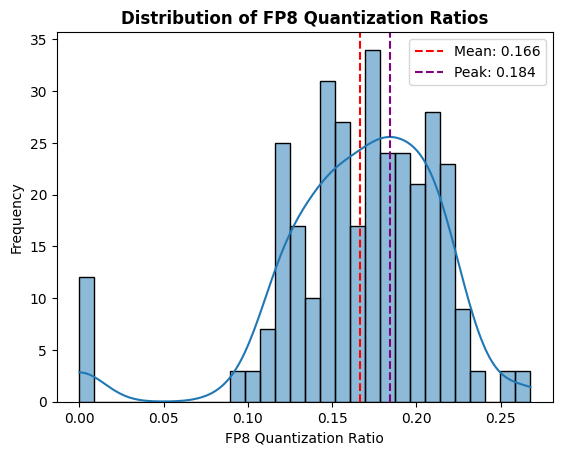

In [ ]:
plt.figure(figsize=(14, 7))

ax = sns.histplot(data=mem_data, x='quant_ratio', bins=30, kde=True)
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()

# 3. Find the x value where y is maximum
peak_x = x_data[np.argmax(y_data)]
plt.title('Distribution of FP8 Quantization Ratios', fontweight='bold')
plt.xlabel('FP8 Quantization Ratio')
plt.ylabel('Frequency')
plt.axvline(mem_data['quant_ratio'].mean(), color='red', linestyle='--', 
            label=f'Mean: {mem_data["quant_ratio"].mean():.3f}')
plt.axvline(peak_x, color='purple', linestyle='--', label=f'Peak: {peak_x:.3f}')

plt.legend()
mem_root = Path('/var/scratch/jle385/thesis/adkv/experiments/analysis/plots/memory')
mem_root.mkdir(parents=True, exist_ok=True)
plt.tight_layout()
plt.savefig(mem_root / 'longbench_relative_per_model_grouped_budgets.png', dpi=300, bbox_inches='tight')

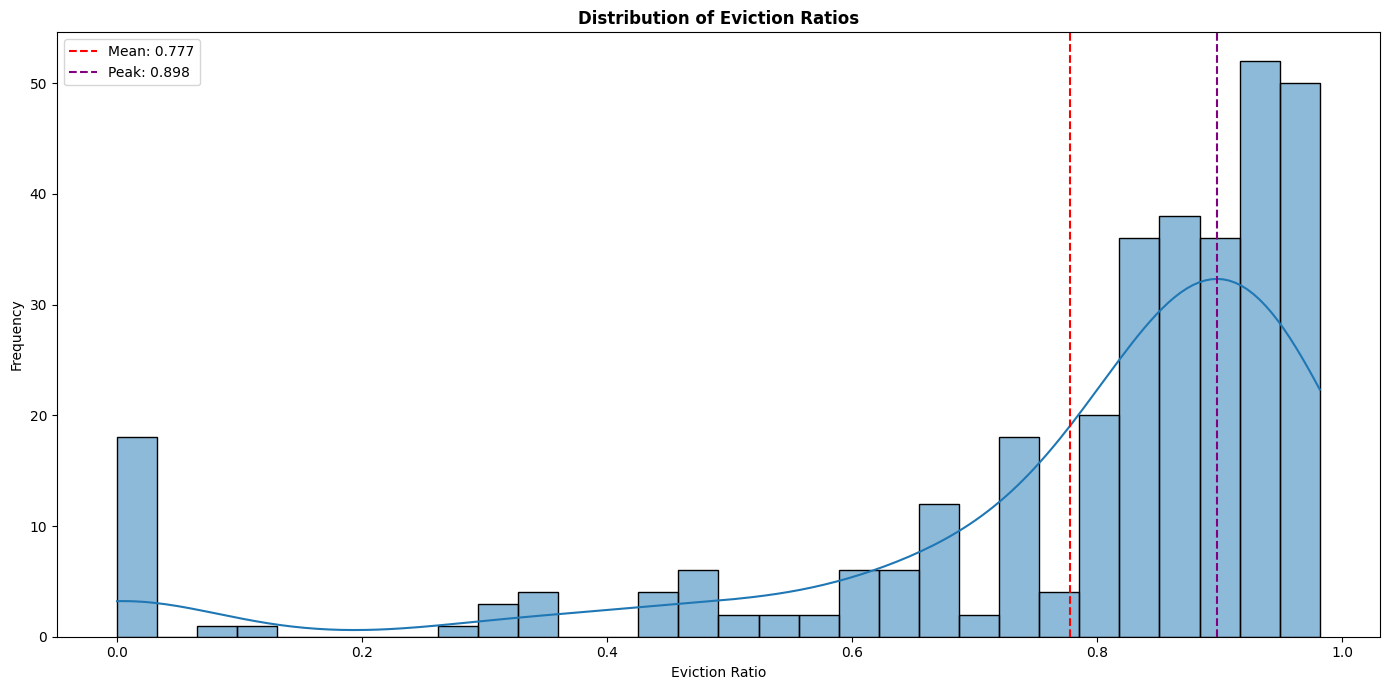

In [3]:
plt.figure(figsize=(14, 7))

ax = sns.histplot(data=mem_data, x='evict_ratio', bins=30, kde=True)
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()

# 3. Find the x value where y is maximum
peak_x = x_data[np.argmax(y_data)]
plt.title('Distribution of Eviction Ratios', fontweight='bold')
plt.xlabel('Eviction Ratio')
plt.ylabel('Frequency')
plt.axvline(mem_data['evict_ratio'].mean(), color='red', linestyle='--', 
            label=f'Mean: {mem_data["evict_ratio"].mean():.3f}')
plt.axvline(peak_x, color='purple', linestyle='--', label=f'Peak: {peak_x:.3f}')
plt.legend()
mem_root = Path('/var/scratch/jle385/thesis/adkv/experiments/analysis/plots/memory')
mem_root.mkdir(parents=True, exist_ok=True)
plt.tight_layout()
plt.savefig(mem_root / 'memory_distribution_of_eviction_ratios.png', dpi=300, bbox_inches='tight')

In [9]:
mem_data.groupby('budget')['evict_ratio'].mean().reset_index()

,budget,evict_ratio
0,512,0.878003
1,1024,0.794681
2,2048,0.659741
